In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

In [1]:
from pandas_gbq import read_gbq
merged_data = read_gbq(f"""


SELECT *
FROM capstone-398012.capstone_final.CRI_Compustat_Merged_785k

""",project_id='capstone-398012', dialect='standard')

c:\Documents\Capstone\.venv\lib\site-packages\google\cloud\bigquery\table.py:2155: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


In [3]:
import pandas as pd

obj = pd.read_pickle("../data_cleaning/CRI_Merged_Imputed.pkl")
df = obj.copy()

In [4]:
df.head()

,CompanyNumber,yyyy,mm,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,...,liqfinlevel_imputed,dtdtrend_imputed,liqnonfintrend_imputed,ni2tatrend_imputed,sizetrend_imputed,lqfintrend_imputed,DTDmedianFin_imputed,DTDmedianNonFin_imputed,m2b_imputed,sigma_imputed
543144,7998,1992.0,10,-0.135532,0.010330,5.979180,-6.041208,0.0,0.0,-0.003558,...,-0.021141,-6.041208,0.0,0.017182,-1.353150,0.087634,1.533998,0.0,0.152292,0.087389
1800289,7998,1992.0,11,-0.160442,0.017694,5.477271,-5.520990,0.0,0.0,-0.001411,...,-0.028360,-5.520990,0.0,0.015034,-1.087890,0.076680,0.793305,0.0,0.152292,0.089124
1517675,7998,1992.0,12,-0.131720,0.013906,4.806622,-4.837685,0.0,0.0,0.000737,...,-0.033487,-4.837685,0.0,0.012886,-0.789886,0.065725,1.291160,0.0,0.152292,0.087559
646657,7998,1992.0,2,0.006439,0.014783,5.899638,4.759039,0.0,0.0,-0.016808,...,-0.039372,4.759039,0.0,0.004659,1.608332,-0.098975,1.784382,0.0,9.843994,0.108152
2212180,7998,1992.0,3,-0.049128,0.014538,6.704363,5.078827,0.0,0.0,-0.016142,...,-0.046436,5.078827,0.0,0.003993,1.388322,-0.084835,1.718525,0.0,10.636332,0.086579


In [5]:
import pandas as pd

# Assuming 'EventDate' and 'StartDate' are datetime columns
df['Duration'] = df['EventDate'] - df['StartDate']

# Convert 'Duration' to the number of days
df['DaysDuration'] = df['Duration'].dt.days


c:\Documents\Capstone\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Documents\Capstone\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Documents\Capstone\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Documents\Capstone\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  

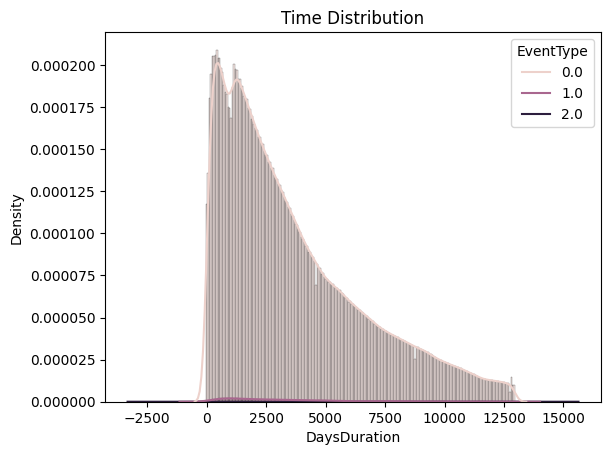

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram with the 'EventType' hue
sns.histplot(data=df, x='DaysDuration', hue='EventType', stat='density', ax=ax)

# Create the KDE plot with the 'EventType' hue
sns.kdeplot(data=df, x='DaysDuration', hue='EventType', fill=False, ax=ax)

# Set the title
ax.set_title('Time Distribution')

# Show the plot
plt.show()


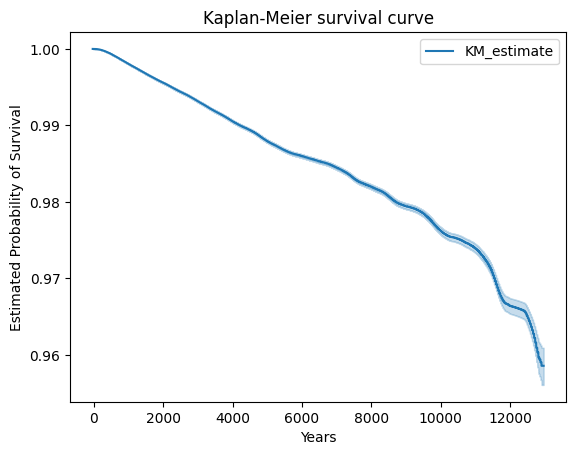

In [7]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

kmf.fit(durations=df['DaysDuration'], event_observed=df['EventType'])

fig, ax =  plt.subplots()
kmf.plot_survival_function(color='C0',ax=ax)
ax.set(
    title='Kaplan-Meier survival curve',
    xlabel='Years',
    ylabel='Estimated Probability of Survival'
);

In [8]:
df.columns

Index(['CompanyNumber', 'yyyy', 'mm', 'StkIndx', 'STInt', 'dtdlevel',
       'dtdtrend', 'liqnonfinlevel', 'liqnonfintrend', 'ni2talevel',
       'ni2tatrend', 'sizelevel', 'sizetrend', 'm2b', 'sigma', 'liqfinlevel',
       'lqfintrend', 'DTDmedianFin', 'DTDmedianNonFin', 'dummy297fin',
       'EventDate', 'EventDate_string', 'Value', 'StartDate', 'Duration',
       'EventType', 'dtdlevel_imputed', 'liqnonfinlevel_imputed',
       'ni2talevel_imputed', 'sizelevel_imputed', 'liqfinlevel_imputed',
       'dtdtrend_imputed', 'liqnonfintrend_imputed', 'ni2tatrend_imputed',
       'sizetrend_imputed', 'lqfintrend_imputed', 'DTDmedianFin_imputed',
       'DTDmedianNonFin_imputed', 'm2b_imputed', 'sigma_imputed',
       'DaysDuration'],
      dtype='object')

In [145]:
df_selected_features = df[[
       'DTDmedianFin', 'DTDmedianNonFin', 'dummy297fin', 'sic', 'atq',
       # 'ltq', 'dlcq', 'txditcq', 'cheq', 
       # 'lctq', 'actq', 'invtq', 'intanq',
       # 'oibdpq', 'txpq', 'piq', 'niq', 'revtq', 'cogsq', 'oancfy', 'ivncfy',
       # 'fincfy', 'dltisy', 'dltry', 'ceqq', 'dpq', 'saleq', 'saley', 'invchy',
       # 'rectq', 'wcapq', 'prccq', 'epsf12', 'cshoq', 'dvy', 'req', 'dlttq',
       # 'chechy', 
       'current_ratio', 'quick_ratio',
       'cash_ratio', 'net_working_capital', 'debt_ratio',
       'debt_to_equity_ratio', 'equity_ratio', 'financial_leverage_ratio',
       'cashflow_to_debt_ratio', 'net_profit_margin', 'asset_turnover',
       'receivables_turnover', 'day_sales_outstanding',
       'working_capital_turnover', 'price_to_earnings', 'retention_ratio'
       'EventType', 'DaysDuration'
       ]]


C:\Users\shiho\AppData\Local\Temp\ipykernel_17600\1485961555.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features2['EventType'] = y_event
C:\Users\shiho\AppData\Local\Temp\ipykernel_17600\1485961555.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features2['DaysDuration'] = y_duration


In [148]:
# # Fit the Cox Proportional-Hazards (CoxPH) model with the selected features
cph = CoxPHFitter()
cph.fit(df_selected_features2, duration_col="DaysDuration", event_col="EventType")
cph.print_summary()   

<lifelines.CoxPHFitter: fitted with 579225 total observations, 574747 right-censored observations>
             duration col = 'DaysDuration'
                event col = 'EventType'
      baseline estimation = breslow
   number of observations = 579225
number of events observed = 4478
   partial log-likelihood = -55037.12
         time fit was run = 2023-10-10 13:35:03 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
DTDmedianFin              -0.75       0.47       0.05            -0.85            -0.66                 0.43                 0.52
DTDmedianNonFin           -0.54       0.58       0.02            -0.57            -0.50                 0.57                 0.60
dummy297fin               -0.89       0.41       0.14            -1.17            -0.61                 0.31                 0.55
sic                        0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
atq                       -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
current_ratio             -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
quick_ratio                0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
cash_ratio                 0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
net_working_capital        0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
debt_ratio                 0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
debt_to_equity_ratio       0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
equity_ratio              -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
financial_leverage_ratio  -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
cashflow_to_debt_ratio    -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
net_profit_margin          0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
asset_turnover            -0.00       1.00       0.01            -0.03             0.02                 0.97                 1.02
receivables_turnover      -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
day_sales_outstanding     -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
working_capital_turnover  -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
price_to_earnings         -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
retention_ratio           -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00

                           cmp to      z      p   -log2(p)
covariate                                                 
DTDmedianFin                 0.00 -15.55 <0.005     178.63
DTDmedianNonFin              0.00 -31.66 <0.005     728.21
dummy297fin                  0.00  -6.17 <0.005      30.45
sic                          0.00   1.31   0.19       2.40
atq                          0.00  -0.06   0.95       0.07
current_ratio                0.00  -0.53   0.59       0.75
quick_ratio                  0.00   0.38   0.70       0.51
cash_ratio                   0.00   0.57   0.57       0.81
net_working_capital          0.00   2.

In [161]:
df_selected_features

,DTDmedianFin,DTDmedianNonFin,dummy297fin,gvkey,sic,atq,ltq,dlcq,txditcq,cheq,...,cashflow_to_debt_ratio,net_profit_margin,asset_turnover,receivables_turnover,day_sales_outstanding,working_capital_turnover,price_to_earnings,retention_ratio,EventType,DaysDuration
0,0.0,2.197684,0.0,1099,3612.0,1498.445,734.978,2.442,0.00,187.145,...,0.353320,0.496181,0.500283,0.439043,2.277680,6.329094,-10.552301,5.626957,0.0,4624
1,0.0,2.599548,0.0,12950,5084.0,935.418,582.750,10.721,0.95,34.745,...,0.083573,0.744483,0.599170,1.086942,0.756365,6.743183,24.764151,1.554703,0.0,4440
2,0.0,1.863172,0.0,1300,9997.0,828.114,552.946,5.592,0.00,70.794,...,0.133911,0.071330,0.272952,0.377944,2.645895,0.259680,2.413333,2.564052,0.0,4715
3,0.0,2.190358,0.0,1913,2670.0,28.531,2.823,0.280,0.00,7.468,...,-2.910615,-4.460199,0.061243,0.624224,1.601990,0.067056,-0.328146,4.917128,0.0,4562
4,0.0,2.318686,0.0,2150,4833.0,188.600,13.552,0.424,0.00,176.232,...,-9.023313,0.000000,0.000000,0.000000,0.000000,0.000000,-1.096296,48.830226,0.0,4471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579220,0.0,3.622590,0.0,8334,3578.0,539.627,261.521,3.293,0.00,26.890,...,0.114562,0.504109,0.488787,0.643488,1.425451,1.500752,43.333333,14.310707,0.0,11289
579221,0.0,3.604302,0.0,5252,3561.0,539.627,261.521,3.293,0.00,26.890,...,0.114562,0.504109,0.488787,0.643488,1.425451,1.500752,43.333333,14.310707,0.0,11563
579222,0.0,3.911738,0.0,10441,3580.0,539.627,261.521,3.293,0.00,26.890,...,0.114562,0.504109,0.488787,0.643488,1.425451,1.500752,43.333333,14.310707,0.0,11379
579223,0.0,2.410890,0.0,10581,3562.0,539.627,261.521,3.293,0.00,26.890,...,0.114562,0.504109,0.488787,0.643488,1.425451,1.500752,43.333333,14.310707,0.0,11745


In [160]:
import numpy as np
from lifelines import CoxPHFitter
from lifelines.utils import k_fold_cross_validation, concordance_index

# Create the Cox PH model
cph = CoxPHFitter()

# Perform k-fold cross-validation and calculate the concordance index for the Cox PH model
cph_cindex = np.mean(k_fold_cross_validation(cph, df_selected_features2, duration_col='DaysDuration', event_col='EventType', scoring_method=concordance_index))

# Print the average concordance index
print("Average Concordance Index (CoxPH):", cph_cindex)


NotImplementedError: 

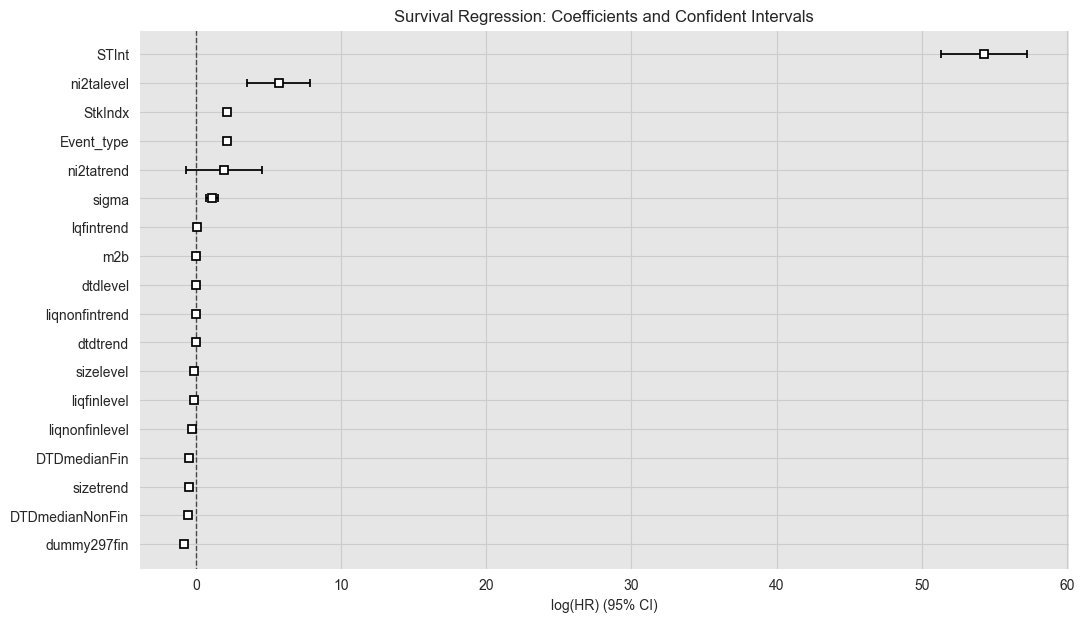

In [23]:
fig_coef, ax_coef = plt.subplots(figsize=(12,7))
ax_coef.set_title('Survival Regression: Coefficients and Confident Intervals')
cph.plot(ax=ax_coef);